## 개념 정리
### 용어 정리
- 드롭아웃
    - 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법
    - 훈련중에만 작동하며, 평가나 예측에서는 사용되지 않음
- 콜백
    - 모델을 훈련하는 도중에 어떤 작업을 수행할 수 있도록 도와주는 도구
    - 예시1) 최상의 결과값을 훈련하는 도중에 저장하거나
    - 예시2) 검증점수가 향상되지 않으면 일찍 종료할 수 있음 (조기종료)
        - 검증 점수가 더 이상 감소하지 않고 상승하여 과대적합이 일어나면, 훈련을 멈추는 도구
        - 학습하는데 드는 계산 비용과 시간을 절약할 수 있음
### 핵심 패키지와 함수 (Tensorflow)
- Dropout
    - 첫번째 매개변수에 드롭아웃할 비율(r)을 지정
    - 드롭아웃 하지 않는 뉴런의 출력은 1/(1-r)만큼 증가시켜 출력의 총합이 같도록 함
- save_weights()
    - 모든 층의 가중치와 절편을 파일에 저장
    - 첫번째 매개변수에 저장할 파일이름을 지정
    - save_format 매개변수에서 저장할 파일 포멧을 지정.
        - 기본적으로 keras는 Checkpoint 포맷을 사용함.
        - 매개변수에 h5를 넘기거나, 파일이름에 .h5가 붙어있으면 HDF5 포멧으로 저장됨
- load_weights()
    - 모든 층의 가중치와 절편을 파일에 읽음
    - 첫번째 매개변수에 읽을 파일을 지정
- save()
    - 모델 구조와 모든 가중치와 절편을 파일에 저장
    - 첫번째 매개변수에 저장할 파일을 지정
    - save_format 매개변수에서 저장할 파일 포멧을 지정.
        - 기본적으로 keras는 Checkpoint 포맷을 사용함.
        - 매개변수에 h5를 넘기거나, 파일이름에 .h5가 붙어있으면 HDF5 포멧으로 저장됨
- load_model()
    - model.save()로 저장된 모델을 로드
    - 첫번째 매개변수에 읽을 파일을 지정
- ModelCheckpoint
    - 케라스 모델과 가중치를 일정 간격으로 저장
    - 첫번째 매개변수에 저장할 파일을 지정
    - monitor 매개변수는 모니터링할 지표를 저장. 기본값은 'val_loss'로 검증 손실을 관찰
    - save_weights_only 매개변수는 False인 경우 전체모델을 저장 (기본값), True일 경우 모델 가중치와 절편만 저장
    - best_weights_only 매개변수는 True일 경우 가장 낮은 검증 검수를 만드는 모델을 저장
- EarlyStopping
    - 관심지표가 더 이상 향상되지 않으면 훈련을 중지
    - monitor 매개변수는 모니터링할 지표를 지정. 기본값은 'val_loss'
    - patience 매개변수는 모델이 향상 되지 않고 지속할 수 있는 에포크의 최대 갯수
    - restore_best_weights 매개변수는 최상의 모델 가중치를 복원할지 정함. 기본값은 False
### 핵심 패키지와 함수 (Numpy)
- argmax()
    - 배열에서 축을 따라 최댓값의 인덱스를 반환함
    - axis 매개변수에는 어떤 축을 따라 최대값을 찾을지 지정할 수 있음
        - 예를 들어, 2차원 배열에서 1을 지정하였으면, 열(row)별로 최대값을 찾게 됨.

In [1]:
'''데이터 처리하기'''
from tensorflow import keras
from sklearn.model_selection import train_test_split
# 데이터 불러오기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 데이터 변환하기
train_scaled = train_input / 255.0
# 검증 데이터 나누기
train_scaled, val_scaled, train_target, val_target = train_test_split(train_input, train_target, random_state=42, test_size=0.2)

In [2]:
'''모델 만들기'''
def model_func(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = model_func()
model.summary()

'''모델 구성하기'''
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
'''모델 학습하기'''
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy'])


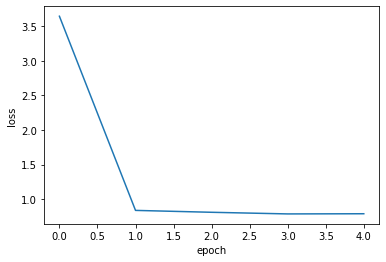

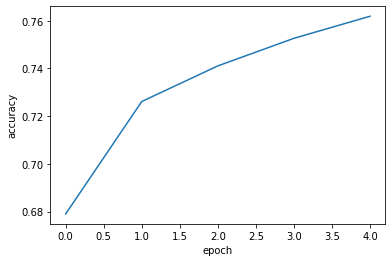

In [3]:
'''학습 결과 확인하기'''
# 훈련 측정값이 저장된 history 딕셔너리 값 확인
print(history.history.keys())
# 학습 결과에 대한 loss 출력
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# 학습 결과에 대한 accuracy 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

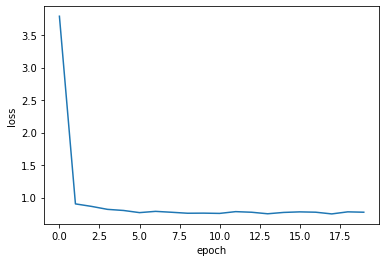

In [4]:
'''에포크를 늘려서 실행해보기'''
# 모델 구성하기
model = model_func()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# 모델 학습하기
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
# 학습 결과에 대한 loss 출력
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 4.5032 - accuracy: 0.6630 - val_loss: 1.1820 - val_accuracy: 0.6973
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.9103 - accuracy: 0.7358 - val_loss: 0.7641 - val_accuracy: 0.7441
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8248 - accuracy: 0.7668 - val_loss: 0.8230 - val_accuracy: 0.7747
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7996 - accuracy: 0.7756 - val_loss: 0.9816 - val_accuracy: 0.7788
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7857 - accuracy: 0.7888 - val_loss: 0.8418 - val_accuracy: 0.7693
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7592 - accuracy: 0.7981 - val_loss: 0.9647 - val_accuracy: 0.7880
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7437 - accuracy: 0.8042 - val_loss: 0.8972 - val_accuracy:

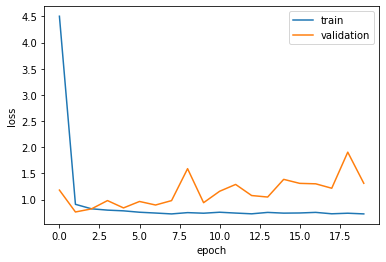

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 3.7247 - accuracy: 0.6760 - val_loss: 0.8926 - val_accuracy: 0.6699
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7526 - accuracy: 0.7386 - val_loss: 0.7104 - val_accuracy: 0.7519
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6617 - accuracy: 0.7640 - val_loss: 0.7185 - val_accuracy: 0.6973
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6524 - accuracy: 0.7538 - val_loss: 0.6462 - val_accuracy: 0.7417
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6222 - accuracy: 0.7599 - val_loss: 0.5989 - val_accuracy: 0.7722
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5840 - accuracy: 0.7763 - val_loss: 0.6452 - val_accuracy: 0.7887
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5668 - accuracy: 0.7899 - val_loss: 0.6156 - val_accuracy:

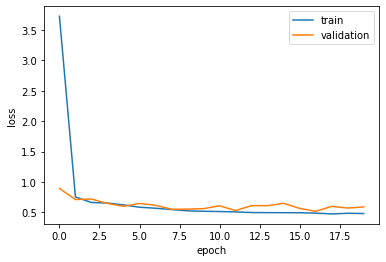

In [5]:
'''검증셋에 대한 점수 얻기'''
# 모델 구성하기
model = model_func()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# 모델 학습하기
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data = (val_scaled, val_target)) # 검증 데이터를 넘겨주면, 에포크마다 검증 손실을 계산함
# 훈련 측정값이 저장된 history 딕셔너리 값 확인
print(history.history.keys())
# 학습 결과에 대한 loss 출력
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train') # 학습 데이터에 대한 손실값 시각화
plt.plot(history.history['val_loss'], label = 'validation') # 검증 데이터에 대한 손실값 시각화
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 3.1818 - accuracy: 0.4225 - val_loss: 1.2519 - val_accuracy: 0.5451
Epoch 2/20
1500/1500 [================

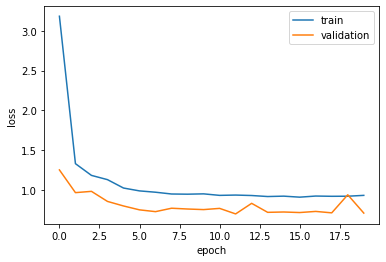

In [6]:
'''Dropout 적용하기'''
# 모델 구성하기
model = model_func(keras.layers.Dropout(0.3)) # Dropout은 층처럼 다뤄지지만, 모델 파라미터 값은 없음.
model.summary()
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# 모델 학습하기
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data = (val_scaled, val_target)) # 검증 데이터를 넘겨주면, 에포크마다 검증 손실을 계산함
# 훈련 측정값이 저장된 history 딕셔너리 값 확인
print(history.history.keys())
# 학습 결과에 대한 loss 출력
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train') # 학습 데이터에 대한 손실값 시각화
plt.plot(history.history['val_loss'], label = 'validation') # 검증 데이터에 대한 손실값 시각화
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
'''모델 저장과 복원'''
model.save_weights('model-weights.h5') # 훈련된 모델의 파라미터를 저장
model.save('model-whole.h5') # 훈련된 모델 구조와 파라미터를 저장

# 모델이 저장되었는지 확인
# !where "*.h5" # Windows
# !ls -al *.h5 # Unix (Linux/MacOS)

# 저장된 데이터 불러오기
model = model_func(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

'''정확도 확인하기'''
# 1. 10개의 확률 중에 가장 큰 값을 골라 Target 레이블과 비교함.
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1) # predict에서 가장 큰 값의 인덱스들을 반환함. # axis = -1은 마지막 차원을 기준으로 가장 큰 값들을 골라냄.
print(np.mean(val_labels == val_target))
# 2. 모델을 복원하여, 정확도를 구함.
model = keras.models.load_model('model-whole.h5')
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy') # load_model()에 버그가 있어, evaluate()를 실행하기 전에 해당함수를 실행해야 함.
model.evaluate(val_scaled, val_target)

0.71875
375/375 [==============================] - 1s 2ms/step - loss: 0.7097 - accuracy: 0.7188


[0.7097399830818176, 0.71875]

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.9037 - accuracy: 0.4778 - val_loss: 1.1914 - val_accuracy: 0.5538
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 1.2422 - accuracy: 0.5237 - val_loss: 0.9251 - val_accuracy: 0.6803
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 1.0916 - accuracy: 0.5875 - val_loss: 0.8288 - val_accuracy: 0.6806
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 1.0318 - accuracy: 0.6076 - val_loss: 0.7518 - val_accuracy: 0.7138
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.9967 - accuracy: 0.6219 - val_loss: 0.7907 - val_accuracy: 0.7080
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.9874 - accuracy: 0.6278 - val_loss: 0.7358 - val_accuracy: 0.7113
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.9554 - accuracy: 0.6381 - val_loss: 0.7639 - val_accuracy:

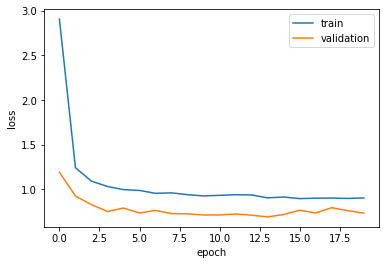

In [17]:
'''콜백 사용하기 #1: 훈련 중간에 낮은 점수 저장하기'''
# 모델 생성하고, 구성하기
model = model_func(keras.layers.Dropout(0.3)) # Dropout은 층처럼 다뤄지지만, 모델 파라미터 값은 없음.
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# 콜백 사용하기: 훈련 중간에 작업을 수행함
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True) # 에포크마다 다장 낮은 점수들을 저장함.
# 모델 학습하기
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb]) # callbacks에 미리 정의된 콜백 함수를 넘김
# 훈련 측정값이 저장된 history 딕셔너리 값 확인
print(history.history.keys())
# 학습 결과에 대한 loss 출력
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train') # 학습 데이터에 대한 손실값 시각화
plt.plot(history.history['val_loss'], label = 'validation') # 검증 데이터에 대한 손실값 시각화
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.8259 - accuracy: 0.4674 - val_loss: 1.2647 - val_accuracy: 0.5319
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 1.3460 - accuracy: 0.4976 - val_loss: 1.0318 - val_accuracy: 0.6042
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 1.1876 - accuracy: 0.5370 - val_loss: 0.9250 - val_accuracy: 0.6264
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 1.1003 - accuracy: 0.5747 - val_loss: 0.8389 - val_accuracy: 0.6605
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0445 - accuracy: 0.5969 - val_loss: 0.7999 - val_accuracy: 0.6658
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0127 - accuracy: 0.6160 - val_loss: 0.7563 - val_accuracy: 0.7151
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.9650 - accuracy: 0.6261 - val_loss: 0.8159 - val_accuracy:

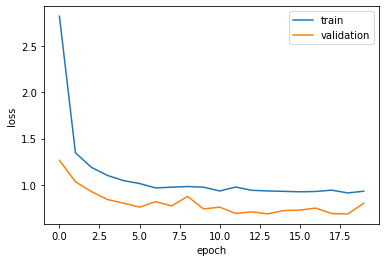

In [18]:
'''콜백 사용하기 #2: 훈련 중간에 낮은 점수 저장하기 + 조기 종료'''
# 모델 생성하고, 구성하기
model = model_func(keras.layers.Dropout(0.3)) # Dropout은 층처럼 다뤄지지만, 모델 파라미터 값은 없음.
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# 콜백 사용하기: 훈련 중간에 작업을 수행함
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True) # 에포크마다 다장 낮은 점수들을 저장함.
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2)
# 모델 학습하기
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb]) # callbacks에 미리 정의된 콜백 함수를 넘김
# 훈련이 중지된 Epoch 출력
print(early_stopping_cb.stopped_epoch)
# 학습 결과에 대한 loss 출력
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train') # 학습 데이터에 대한 손실값 시각화
plt.plot(history.history['val_loss'], label = 'validation') # 검증 데이터에 대한 손실값 시각화
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()